# 07. The basics of data visualization

EDA (exploratory data analysis)
* organize
* check missing data
* identify outliner
* Refine selection
* Discover features and patterns in data
* investigate relationship between variables of data
* Obtain informative plot of data

bar chart : categorical data
histogram : histograms are used for quantitative continuous data that has been grouped into "bins" represented by intervals 
Pie Chart :
Scatter  plots :
line graph :

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

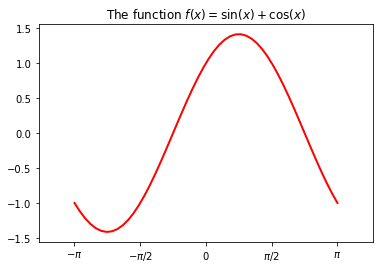

In [2]:
np.linspace(0, 5, 2)
#array([ 0.,  5.])
np.linspace(0, 5, 9)
#array([ 0.   ,  0.625,  1.25 ,  1.875,  2.5  ,  3.125,  3.75 ,  4.375,  5.   ])
X = np.linspace(-np.pi, np.pi)
Y = np.sin(X) + np.cos(X)
plt.plot(X,Y, color='red', linewidth=2.0)
plt.xlim(-4,4)
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], ['$-\pi$', '$-\pi/2$', '$0$', '$\pi/2$', '$\pi$'])
plt.title('The function $f(x)=\sin(x) + \cos(x)$');

## 05. Exercise: plotting a function

=============    ===============================
character        description
=============    ===============================
``'-'``          solid line style
``'--'``         dashed line style
``'-.'``         dash-dot line style
``':'``          dotted line style
=============    ===============================

Example format strings::

    'b'    # blue markers with default shape
    'ro'   # red circles
    'g-'   # green solid line
    '--'   # dashed line with default color
    'k^:'  # black triangle_up markers connected by a dotted line

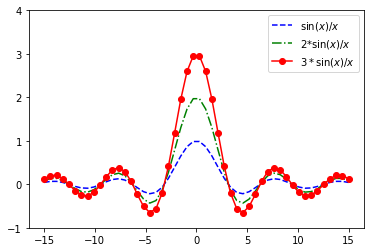

In [3]:
X = np.linspace(-15, 15, 50)
Y_1 = np.sin(X) / X
Y_2 = 2*np.sin(X) / X
Y_3 = 3*np.sin(X) / X
plt.plot(X,(Y_1), color='blue', linestyle = 'dashed', label = '$\sin(x)/x$')
plt.plot(X,(Y_2), color='green', linestyle = 'dashdot', label = '2*$\sin(x)/x$')
plt.plot(X,(Y_3), color='red', linestyle = '-', marker = 'o', label = '$3*\sin(x)/x$');
plt.legend(loc="upper right")
plt.ylim(-1,4);

#### 07. Example: bar plots

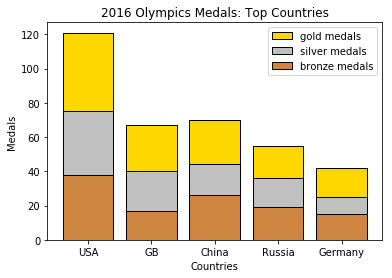

In [4]:
countries = ['USA', 'GB', 'China', 'Russia', 'Germany']
bronzes = np.array([38, 17, 26, 19, 15])
silvers = np.array([37, 23, 18, 17, 10])
golds = np.array([46, 27, 26, 19, 17])
total = np.array([121,67,70,55,42])
x_cor = np.arange(5)
plt.xticks(x_cor, countries)
plt.ylabel("Medals")
plt.xlabel("Countries")
plt.title("2016 Olympics Medals: Top Countries")

plt.bar(x_cor, golds, color='gold', edgecolor='black', bottom=silvers+bronzes, label='gold medals')
plt.bar(x_cor, silvers, color='silver', edgecolor='black', bottom=bronzes, label='silver medals')
plt.bar(x_cor, bronzes, color='#CD853F', edgecolor='black', label='bronze medals')

plt.legend(loc="upper right")
#plt.bar(x_cor, total, color='green', edgecolor='black');

## 08. Exercise: scatter plot IRIS

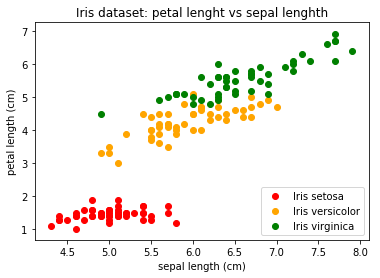

In [5]:
## 1 import data + tools
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
iris = datasets.load_iris()

# store data on dataFrame 
iris_df = pd.DataFrame(iris['data'], 
columns=iris['feature_names'])
iris_df['species'] = iris['target']

# control
iris_df.tail()

# labels 
species = ['Iris setosa', 'Iris versicolor', 'Iris virginica']
colors = ['red', 'orange', 'green']
iris_df['species'].unique()

# DataFrame that contains the observations from that species.
df_1 = iris_df.loc[iris_df.species == 0] #.copy() ?
df_2 = iris_df.loc[iris_df.species == 1] #.copy() ?
df_3 = iris_df.loc[iris_df.species == 2] #.copy() ?

df_3.count()

plt.title("Iris dataset: petal lenght vs sepal lenghth")
plt.ylabel("petal length (cm)")
plt.xlabel("sepal length (cm)")

# petal length (cm)
# sepal length (cm)
plt.scatter(df_1['sepal length (cm)'],df_1['petal length (cm)'], color= 'red', label = 'Iris setosa')
plt.scatter(df_2['sepal length (cm)'],df_2['petal length (cm)'], color = 'orange' , label = 'Iris versicolor')
plt.scatter(df_3['sepal length (cm)'],df_3['petal length (cm)'], color = 'green',  label = 'Iris virginica');

plt.legend(loc="lower right");

In [6]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

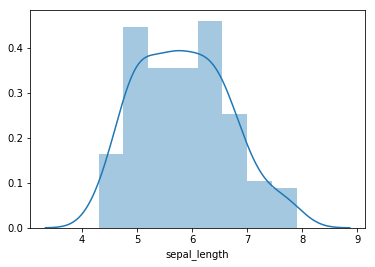

In [7]:
iris = sns.load_dataset('iris')
iris.head()
sns.distplot(iris['sepal_length']);

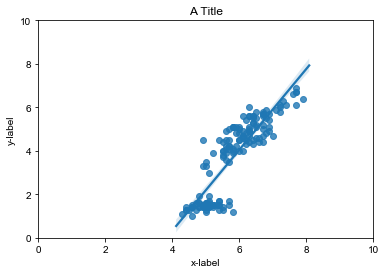

In [8]:
sns.regplot(iris.sepal_length, iris.petal_length)
plt.title("A Title") #Add plot title
plt.ylabel("y-label") #Adjust the label of the y-axis
plt.xlabel("x-label") #Adjust the label of the x-axis
plt.ylim(0,10) #Adjust the limits of the y-axis
plt.xlim(0,10) #Adjust the limits of the x-axis
sns.set_style('whitegrid')
plt.show()

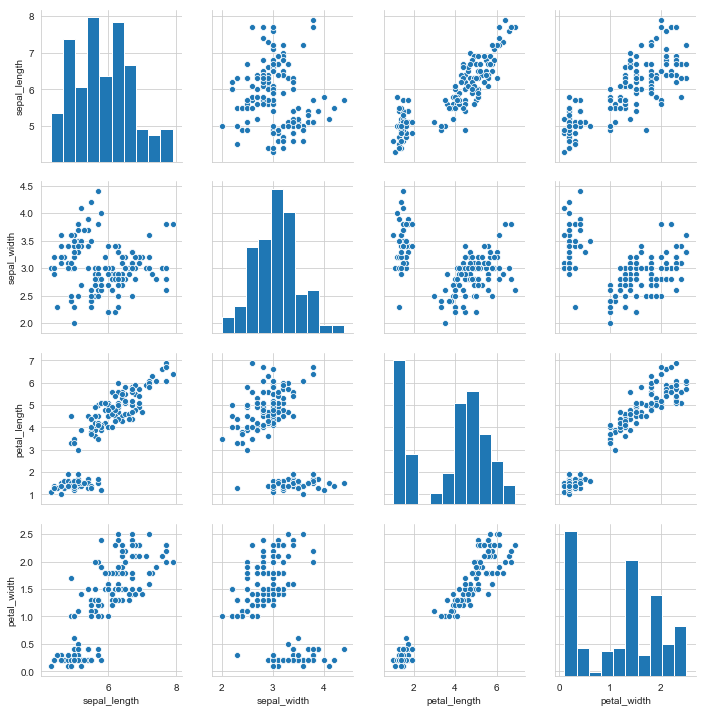

In [9]:
sns.pairplot(iris);

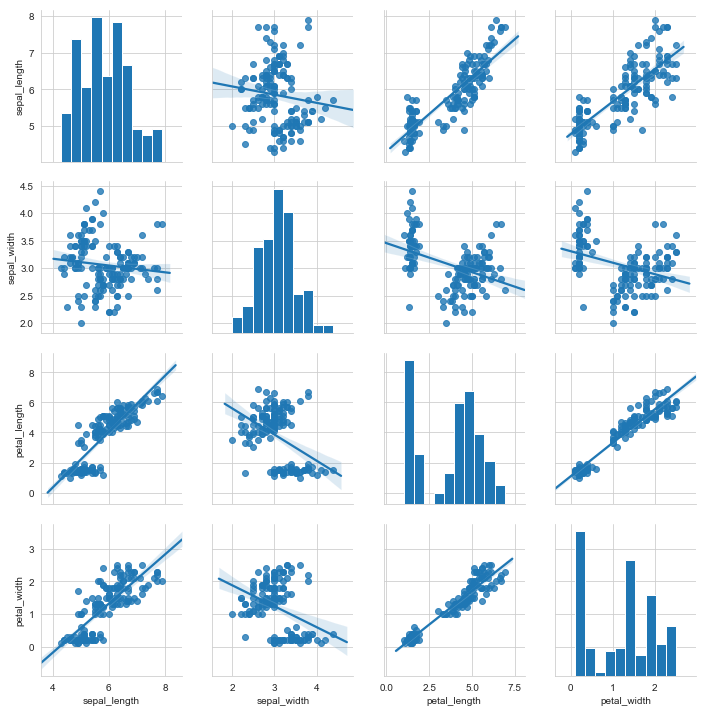

In [10]:
sns.pairplot(iris, kind='reg');

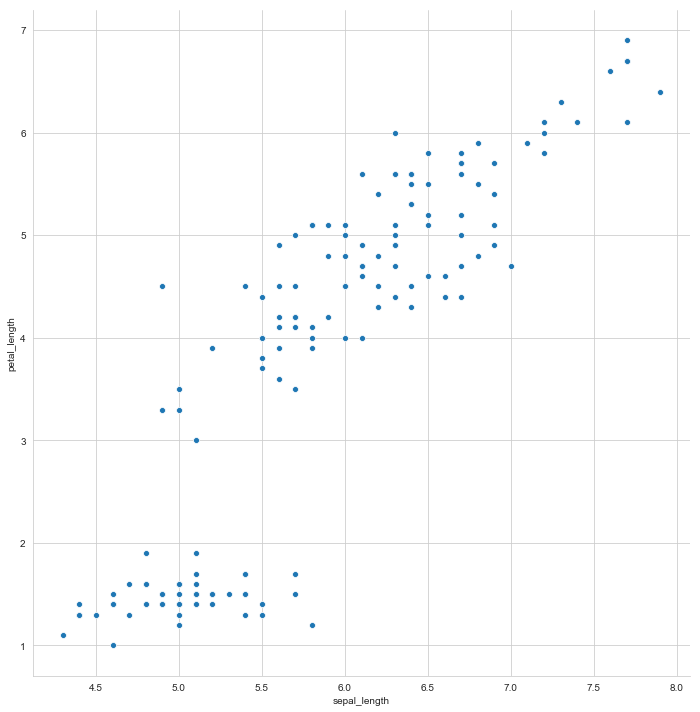

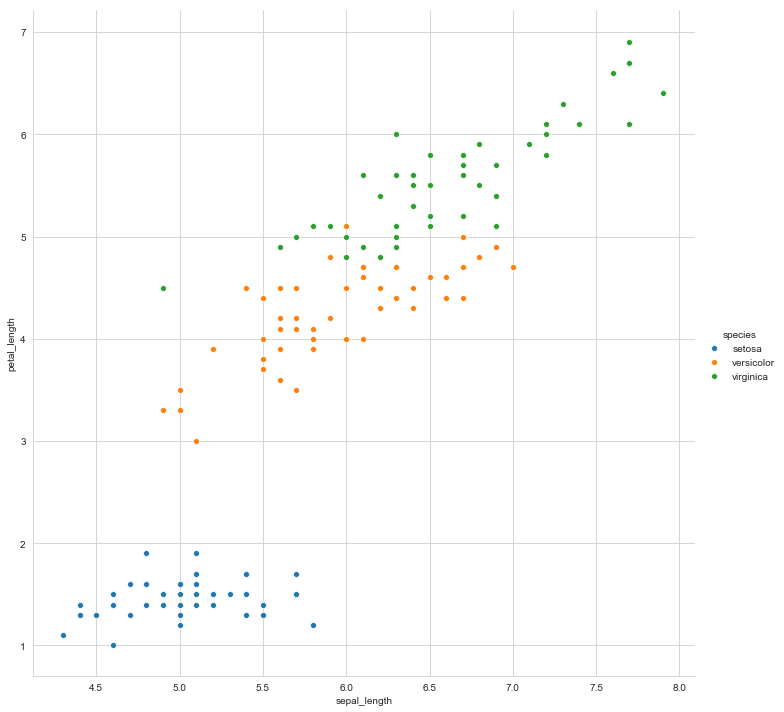

In [11]:
sns.pairplot(iris, x_vars = ['sepal_length'], y_vars=['petal_length'], height = 10);
sns.pairplot(iris,  x_vars = ['sepal_length'], y_vars=['petal_length'], height = 10,  hue='species');

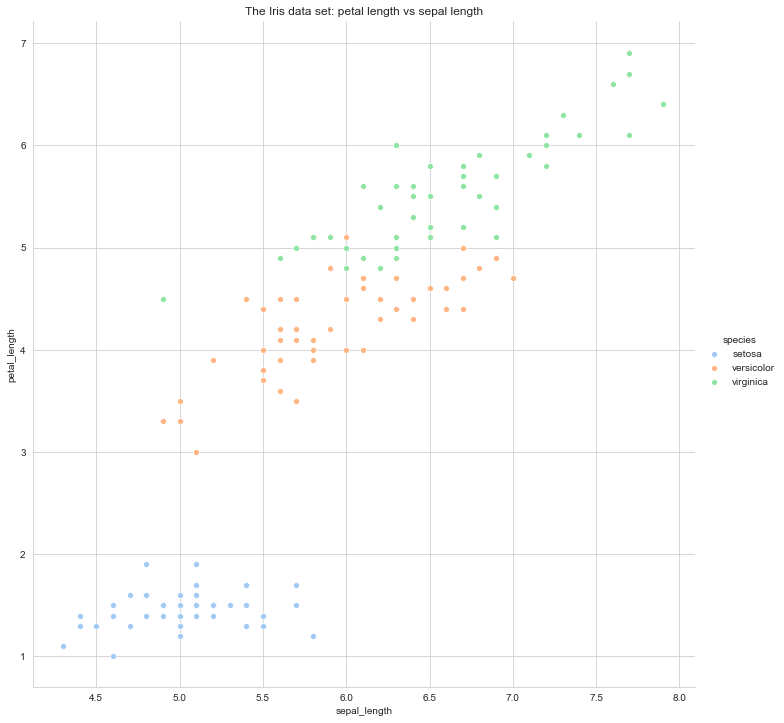

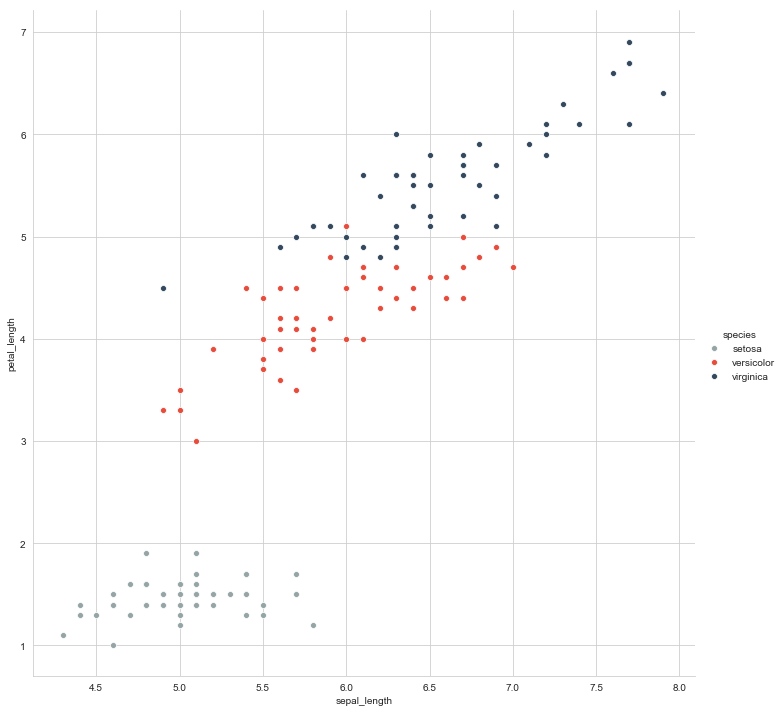

In [12]:
sns.pairplot(iris, x_vars=['sepal_length'], y_vars = ['petal_length'], height = 10, hue='species', palette = 'pastel')
plt.title('The Iris data set: petal length vs sepal length');
my_palette=["#95a5a6", "#e74c3c", "#34495e"]
sns.pairplot(iris, x_vars=['sepal_length'], y_vars = ['petal_length'], height=10, hue='species', palette=my_palette);

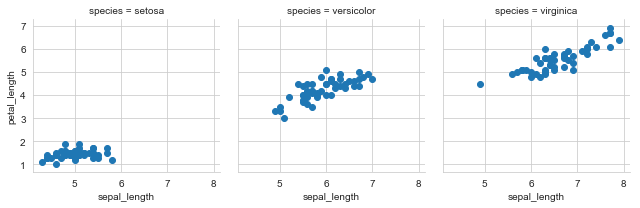

In [13]:
grid = sns.FacetGrid(iris, col='species')
grid = grid.map(plt.scatter, "sepal_length", "petal_length");

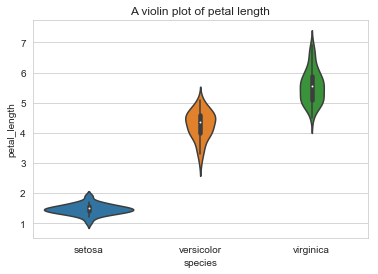

In [38]:
grid = sns.violinplot(iris["species"], iris['petal_length']).set_title('A violin plot of petal length')
#grid = grid.map(plt.scatter, "sepal_length", "petal_length");

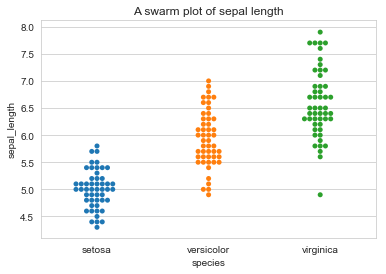

In [41]:
grid = sns.swarmplot(iris["species"], iris['sepal_length']).set_title('A swarm plot of sepal length')